In [15]:
pip install -U pip keras tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np # linear algebra
import os
from time import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
# from keras.utils import np_utils
import json
from PIL import Image
import os
import tensorflow as tf

In [2]:
data_dir ="C:/Users/Gayatri/Downloads/archive (13)/coins/data"

data_train_path =  data_dir + '/train'
data_valid_path = data_dir + '/validation'
data_test_path =  data_dir + '/test'

print(os.listdir("C:/Users/Gayatri/Downloads/archive (13)/coins/data"))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Gayatri/Downloads/archive (13)/coins/data'

In [3]:
with open("C:/Users/Gayatri/Downloads/archive (13)/coins/data/cat_to_name.json", 'r') as json_file:
    cat_2_name = json.load(json_file)

print(cat_2_name['200'])

1 Kurus,Turkish Lira,turkey


In [4]:
batch_size = 60
# Transforms
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,  # randomly shift images horizontally 
    height_shift_range=0.1,  # randomly shift images vertically
    horizontal_flip=True,
    featurewise_std_normalization=True, # Normalize images
    samplewise_std_normalization=True)

datagen_valid = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,  # randomly shift images horizontally
    height_shift_range=0.1,  # randomly shift images vertically
    horizontal_flip=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True)

datagen_test = ImageDataGenerator(
    rescale=1./255,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True)

C:\Users\Gayatri\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1460: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(
C:\Users\Gayatri\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1469: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn(


In [5]:
train_generator = datagen_train.flow_from_directory(
        data_train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

valid_generator = datagen_valid.flow_from_directory(
        data_valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = datagen_test.flow_from_directory(
        data_test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

Found 6413 images belonging to 211 classes.
Found 844 images belonging to 211 classes.
Found 844 images belonging to 211 classes.


C:\Users\Gayatri\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\Gayatri\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the vali

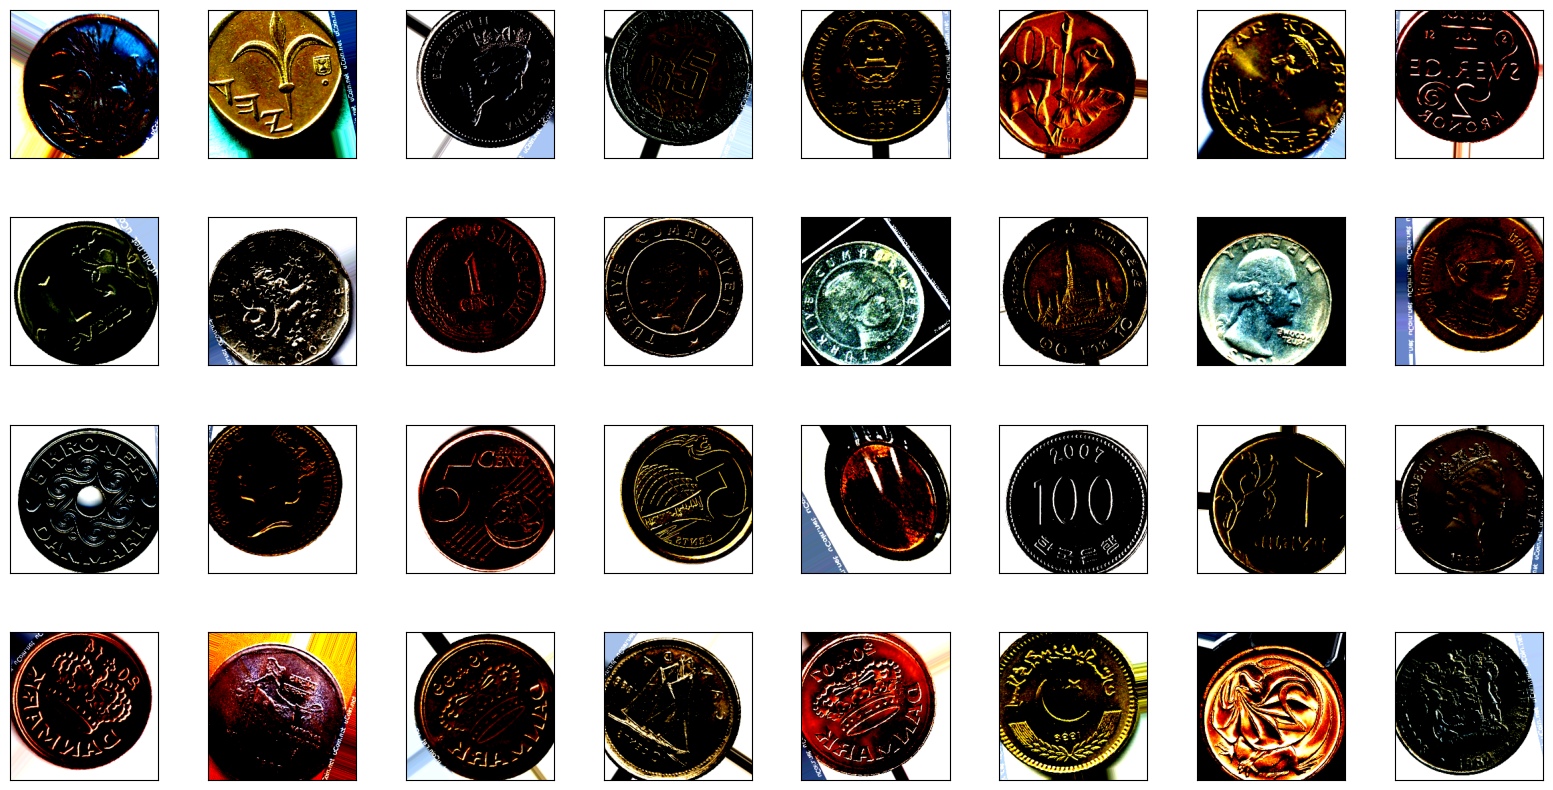

In [6]:
import matplotlib.pyplot as plt


# Lets have a look at some of our images
images, labels = train_generator.next()

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(wspace=0.2, hspace=0.4)

# Lets show the first 32 images of a batch
for i, img in enumerate(images[:32]):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(img)
    image_idx = np.argmax(labels[i])

In [6]:
int_to_dir = {v: k for k, v in train_generator.class_indices.items()}

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization, GlobalAveragePooling2D
from keras.applications import ResNet50
from keras.models import Model



base_model = ResNet50(
    include_top=False,
    weights="imagenet"
)


In [8]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='elu')(x)
x = Dropout(0.95)(x)
# and a logistic layer
predictions = Dense(211, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = True

In [9]:
from keras.optimizers import Adam

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

num_train = len(train_generator.filenames)
num_valid = len(valid_generator.filenames)
num_test = len(train_generator.filenames)


# When to save the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

# Reduce learning rate when loss doesn't improve after n epochs
scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=1e-8, verbose=1)

# Stop early if model doesn't improve after n epochs
early_stopper = EarlyStopping(monitor='val_loss', patience=10,
                              verbose=0, restore_best_weights=True)

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=num_train//batch_size,
                    epochs=20,
                    verbose=1,
                    callbacks=[checkpointer, scheduler, early_stopper],
                    validation_data=valid_generator,
                    validation_steps=num_valid//batch_size)

C:\Users\Gayatri\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\Gayatri\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/20


In [ ]:
model.save('model.h5')